In [154]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as pl
from scipy.optimize import curve_fit
from scipy.stats.distributions import  t
from scipy.stats import chisquare
import scipy
import pandas as pd

In [155]:
pl.rcParams['figure.figsize'] = (16, 5)
pl.rc('xtick', labelsize=16)
pl.rc('ytick', labelsize=16)

In [156]:
data = pd.read_csv("/home/hbueno/IFUSP/Lab 4/Exp 1/Semana2.csv", sep=",")
xdata = np.asarray(data.o)
xerro = np.asarray(data.sigma_objeto)
ydata = np.asarray(data.i)
yerro = np.asarray(data.sigma_imagem)

In [157]:
data

,o,sigma_objeto,i,sigma_imagem
0,29.52,0.05,82.93,0.05
1,25.49,0.05,86.95,0.05
2,20.51,0.05,93.00,0.05
3,15.50,0.05,98.53,0.05
4,10.51,0.05,109.35,0.05
5,9.52,0.05,113.70,0.05
6,8.21,0.05,122.85,0.05
7,40.48,0.05,78.90,0.05
8,38.87,0.05,78.80,0.05
9,37.55,0.05,80.25,0.05


In [158]:
d = 22.1
sigma_d = 0.05

In [159]:
#Modelos
def linear_fit(x, m, b):
    return m*x + b
def hiperbolic_fit(x, a, b):
    return a/x + b
def chi2(obs, esp, erro):
    return np.sum((obs-esp)**2/erro**2)
def chi2red(obs, esp, erro):
    return np.sum((obs-esp)**2/erro**2)/(len(obs)-len(ans))
def residuo(obs, esp):
    return obs - esp
def modelo(x, a, b, c, d):
    return (a*x + b) /(c*x + d)

In [160]:
fit=curve_fit(hiperbolic_fit, xdata, ydata, sigma=yerro, absolute_sigma=True)
ans, cov = fit
print(ans, '\n\n', np.sqrt(np.diag(cov)))
sigma_0 = np.sqrt(np.diag(cov)[0])
sigma_1 = np.sqrt(np.diag(cov)[1])

[432.42046127  69.23869306] 

 [0.30062771 0.01991723]


## i (o) = $\frac{f_c \cdot d}{o} + \frac{f_c}{f_d} \cdot (d - f_d)$

In [161]:
# usando hiperbolic fit:
fc = ans[0]/d
fd = fc*d/(ans[1]+fc)
print(fc, fd)

19.566536709268675 4.8693130166087695


In [162]:
alpha = 0.05 # 95% confidence interval = 100*(1-alpha)

n = len(ydata)    # number of data points
p = len(ans) # number of parameters

dof = max(0, n - p) # number of degrees of freedom

# student-t value for the dof and confidence level
tval = t.ppf(1.0-alpha/2., dof) 

for i, p,var in zip(range(n), ans, np.diag(cov)):
    sigma = var**0.5
    print ('p{0}: {1} [{2}  {3}]'.format(i, p,
                                  p - sigma*tval,
                                  p + sigma*tval))

p0: 432.42046127483775 [431.7985654828433  433.0423570668322]
p1: 69.2386930633691 [69.19749113736387  69.27989498937433]


In [164]:
chi2red(ydata, hiperbolic_fit(xdata, ans[0],ans[1]), yerro)

398.6306589552052

In [165]:
residuo(ydata, hiperbolic_fit(xdata, ans[0],ans[1]))

array([-0.95708267,  0.74698911,  2.67791048,  1.39321266, -1.03240965,
       -0.96101042,  0.94133601, -1.02101671, -1.56347982, -0.50455089,
        0.04577019, -0.12712461, -0.58650749, -0.41666643,  0.23046999,
        0.19726484,  1.48515263,  0.24396062,  0.01759035, -0.71855581,
        0.37517684,  0.31531331,  0.80797778, -1.07022249, -0.51949784])

In [166]:
fit=curve_fit(modelo, xdata, ydata, sigma=yerro, absolute_sigma=True)
ans, cov = fit
sigma_0 = np.sqrt(np.diag(cov)[0])
sigma_1 = np.sqrt(np.diag(cov)[1])
sigma_2 = np.sqrt(np.diag(cov)[2])
sigma_3 = np.sqrt(np.diag(cov)[3])

In [167]:
chi2red(ydata, modelo(xdata, ans[0],ans[1], ans[2], ans[3]), yerro)

305.2739763572305

In [168]:
x_plots = np.linspace(5,50,1000) # vetor para plotar o modelo 

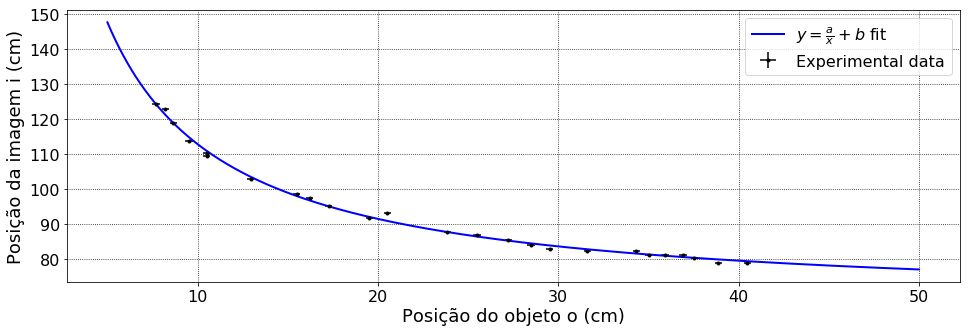

In [169]:
pl.errorbar(xdata, ydata, yerr=4*yerro, xerr=4*xerro, fmt='.',c='k',label=r'Experimental data')
pl.plot(x_plots,modelo(x_plots, ans[0], ans[1], ans[2], ans[3]),c='b',lw=2,label=r'$y=\frac{a}{x} + b$ fit')
pl.xlabel(r'Posição do objeto o (cm)', fontsize=18)
pl.ylabel(r'Posição da imagem i (cm)', fontsize=18)
pl.legend(loc="upper right",fontsize = 16)
pl.grid(ls=':',c='k')
pl.savefig('Semana 2 - Composição de lentes.png')

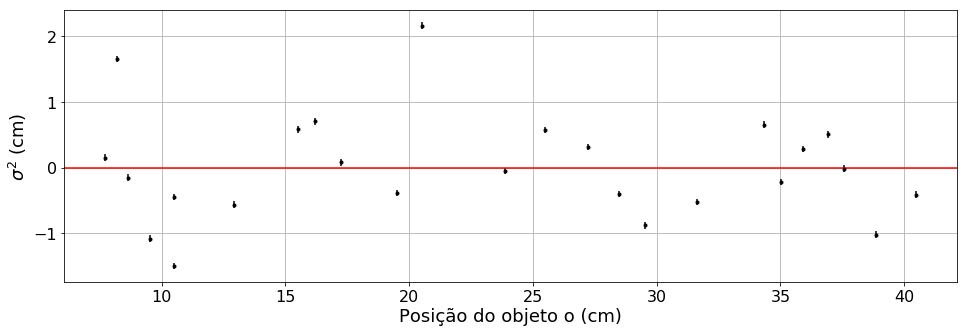

In [170]:
pl.errorbar(xdata, residuo(ydata, modelo(xdata, ans[0],ans[1], ans[2], ans[3])), yerr = yerro, fmt='.', c='k')
pl.axhline(y=0,c='r')
pl.xlabel(r'Posição do objeto o (cm)', fontsize=18)
pl.ylabel(r'$\sigma^2$ (cm)', fontsize=18)
pl.grid()
pl.savefig('Semana 2 - resíduos.png')

In [171]:
from sympy import *
o =Symbol('o')
i = Symbol('i')
fd = Symbol('fd')
fc = Symbol('fc')
d=Symbol('d') # 19.0

In [172]:
A = np.matrix([[1,i],[0,1]]) * np.matrix([[1,0],[-1/fd,1]]) * np.matrix([[1,d],[0,1]]) * np.matrix([[1,0],[-1/fc,1]]) * np.matrix([[1,o],[0,1]])
print(A[0,0], ',', A[0,1], '\n' , A[1,0], ',', A[1,1])

1 - i/fd - (d*(1 - i/fd) + i)/fc , d*(1 - i/fd) + i + o*(1 - i/fd - (d*(1 - i/fd) + i)/fc) 
 -1/fd - (-d/fd + 1)/fc , -d/fd + o*(-1/fd - (-d/fd + 1)/fc) + 1


## i (o) = $\frac{f_{C} f_{D}\left(\frac{d}{f_{D}}-1\right) o-f_{C} f_{D}d}{\left(d-f_{C}-f_{D}\right) o+f_{C} f_{D}-f_{D} d}$

In [174]:
fcfd = -ans[1]/d
sigma_fcfd = -sigma_0/d + sigma_d*ans[1]/d**2

In [175]:
fc = (ans[0] + fcfd)/d
sigma_fc = sigma_0/d + sigma_fcfd/d - sigma_d*(ans[0] + fcfd)/d**2

319123.1385375297

In [177]:
fd=d-fc-ans[2]
print(fc, fd)

22.36332386991012 -13.540535630936514
